<a href="https://colab.research.google.com/github/apoorv19151/ML-Assignment-1/blob/main/ML_A1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment-1**

Answer to Q2 goes here, installing required libraries and importing the Abalone Dataset. One-hot encoding is performed to handle categorical attributes.

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
from google.colab import files

In [20]:
pip install category-encoders

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import category_encoders as ce
abalone_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/abalone_dataset.csv')
encoder = ce.OneHotEncoder(use_cat_names=True)
df_encoded = encoder.fit_transform(abalone_data)
df_encoded.head()

,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Now, plotting histograms for some of the attributes

Text(0, 0.5, 'y-axis (count)')

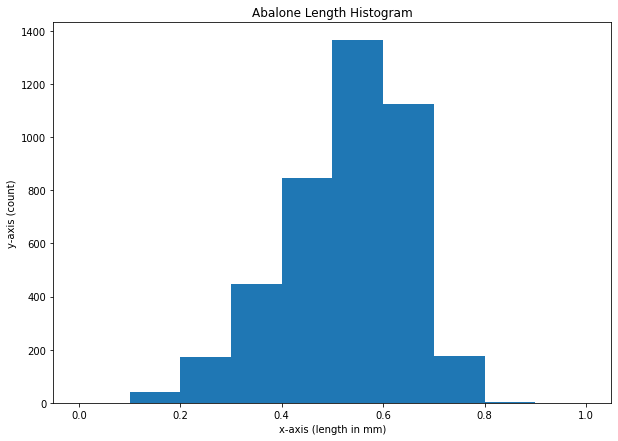

In [22]:
abalone_length = np.array(abalone_data['Length'])
abalone_diameter = np.array(abalone_data['Diameter'])
abalone_height = np.array(abalone_data['Height'])

fig, plot_5 = plt.subplots(figsize = (10, 7))
plot_5.hist(abalone_length, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Abalone Length Histogram')
plt.xlabel("x-axis (length in mm)")
plt.ylabel("y-axis (count)")

Text(0, 0.5, 'y-axis (count)')

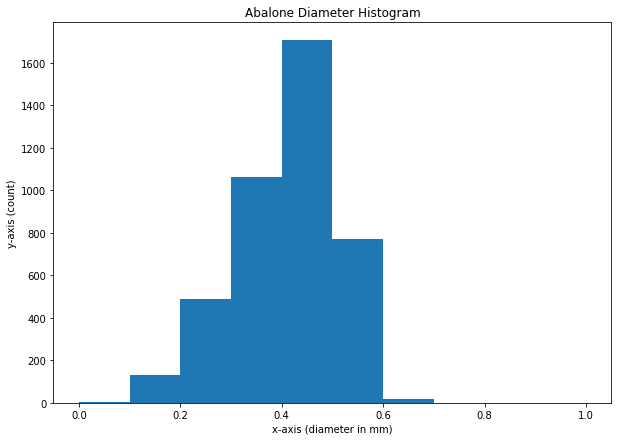

In [23]:
fig, plot_6 = plt.subplots(figsize = (10, 7))
plot_6.hist(abalone_diameter, bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.title('Abalone Diameter Histogram')
plt.xlabel("x-axis (diameter in mm)")
plt.ylabel("y-axis (count)")

Text(0, 0.5, 'y-axis (count)')

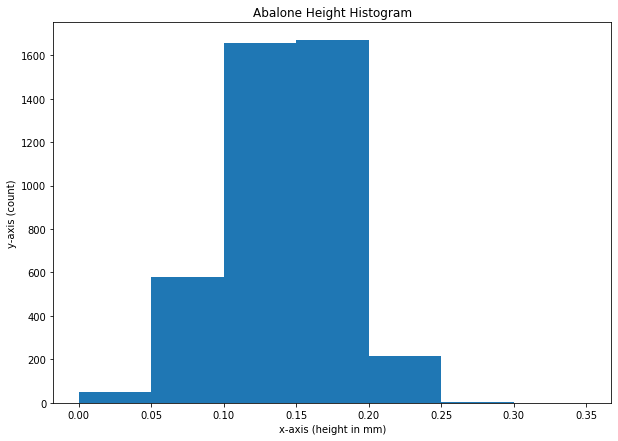

In [24]:
fig, plot_7 = plt.subplots(figsize = (10, 7))
plot_7.hist(abalone_height, bins = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])
plt.title('Abalone Height Histogram')
plt.xlabel("x-axis (height in mm)")
plt.ylabel("y-axis (count)")

Performing normalization of data attributes using sklearn library and dividing the dataset into 90% train set and 10% test set.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df_encoded.drop('Rings', axis = 1)
Y = df_encoded['Rings']
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)
X_norm_df = pd.DataFrame(X_norm, columns = ['Sex_M', 'Sex_F', 'Sex_I', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell Weight'])
X_train, X_test, Y_train, Y_test = train_test_split(X_norm_df, Y, test_size = 0.1)
X_train

,Sex_M,Sex_F,Sex_I,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight
3153,1.0,0.0,0.0,0.472973,0.470588,0.088496,0.143970,0.117350,0.120474,0.133034
2338,1.0,0.0,0.0,0.783784,0.722689,0.172566,0.573048,0.421318,0.470704,0.481814
1258,0.0,0.0,1.0,0.479730,0.436975,0.084071,0.133168,0.117014,0.104674,0.102641
3667,0.0,1.0,0.0,0.689189,0.613445,0.137168,0.365504,0.293208,0.292298,0.317389
3128,0.0,1.0,0.0,0.750000,0.739496,0.168142,0.412077,0.359785,0.277814,0.160438
...,...,...,...,...,...,...,...,...,...,...
2537,0.0,0.0,1.0,0.790541,0.789916,0.190265,0.631840,0.451580,0.475313,0.403587
2705,1.0,0.0,0.0,0.844595,0.831933,0.176991,0.538693,0.465367,0.402238,0.437469
3116,1.0,0.0,0.0,0.527027,0.588235,0.119469,0.274659,0.292535,0.225148,0.143498
3063,0.0,1.0,0.0,0.756757,0.731092,0.137168,0.404817,0.320444,0.398947,0.312905


Defining a function rmse_function to calculate the root mean squared error and another function gradient_descent to train the linear regression model.

In [26]:
def rmse_function(x, y, theta):
    """X, Y and theta should be numpy arrays. This function gives the value of root mean squared error for the given training
    and test data in Linear Regression for a particular value of theta. Theta is a numpy array containing values of parameters"""
    n = len(y)
    rmse = 0
    for i in range(n):
        rmse += (np.dot(x[i], theta)-y[i])**2
    return int((rmse/n)**(1/2))

def gradient_descent(x, y, theta, learning_rate, iterations):
    """This function implements the gradient descent algorithm. This function returns theta (parameters) obtained by using
    the given learning rate and after given number of iterations. It also returns theta and RMSE (Root Mean Squared Error) obtained
    after each iteration. This function can be modified to implement Ridge regression and LASSO regression"""
    m = len(theta)
    n = len(y)
    theta_history = np.zeros((iterations, m))
    rmse_history = np.zeros(iterations)
    for k in range(iterations):
        predictions = np.dot(x, theta.transpose())
        for j in range(m):
            func = 0
            for i in range(n):
                func += (y[i]-predictions[i])*x[i][j]
            theta[j] = theta[j] + learning_rate*func
        theta_history[k] = theta
        rmse_history[k] = rmse_function(x, y, theta)
    return theta, theta_history, rmse_history

(n_rows, n_cols) = X_train.shape  # Now, converting X_train and Y_train pandas dataframe to numpy arrays
x_numpy = np.zeros((n_rows, n_cols))
index = 0
for itr, rows in X_train.iterrows():
  x_numpy[index] = rows
  index += 1
y_numpy = np.array(Y_train)

Using KFold from sklearn library to divide the 90% training data into 5 folds and then plotting rmse vs iterations graph for each of the 5 models on the validation set. Number of iterations taken is 1000 and learning_rate = 0.0001.

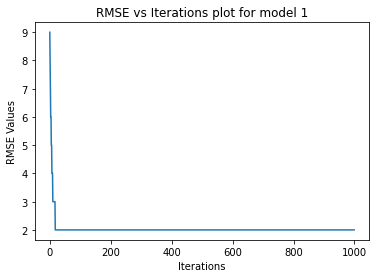

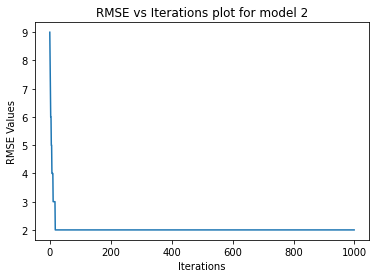

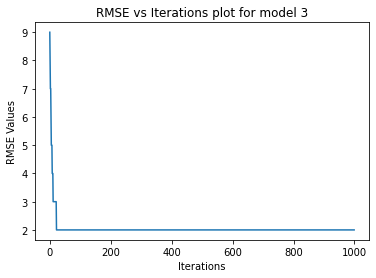

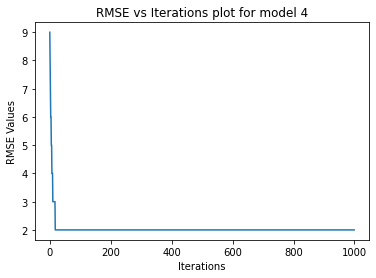

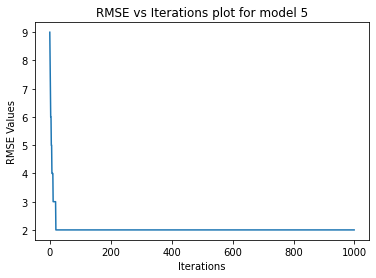

<Figure size 432x288 with 0 Axes>

In [27]:
from sklearn.model_selection import KFold
theta_array = np.zeros((5, n_cols))  # Defining an array to store the theta values of the 5 models
kf = KFold(n_splits = 5)
model = 1
for train_index, val_index in kf.split(x_numpy):
  X_KFold_train, X_KFold_val = x_numpy[train_index], x_numpy[val_index]
  Y_KFold_train, Y_KFold_val = y_numpy[train_index], y_numpy[val_index]
  theta = np.zeros(n_cols)  # n_cols is the number of columns in the training data or dimensions of the training data
  theta_regression, theta_h, rmse_h = gradient_descent(X_KFold_val, Y_KFold_val, theta, 0.0001, 1000)
  theta_array[model-1] = theta_regression
  x_axis = np.arange(0, 1000)
  plt.plot(x_axis, rmse_h)
  plt.title("RMSE vs Iterations plot for model "+str(model)) 
  model += 1
  plt.xlabel("Iterations") 
  plt.ylabel("RMSE Values")
  plt.show()
  plt.savefig("RMSE vs Iterations plot for model "+str(model))

Now defining a function for Ridge Regression. Number of iterations = 1000, learning rate = 0.0001 and ridge_parameter = 10. Also, using KFold for dividing the dataset into 5 parts and plotting rmse vs iterations graph on the validation set for each model.

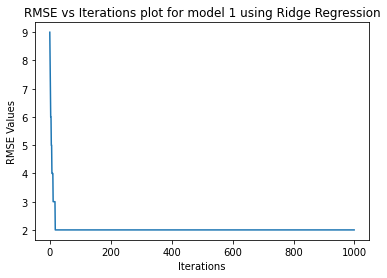

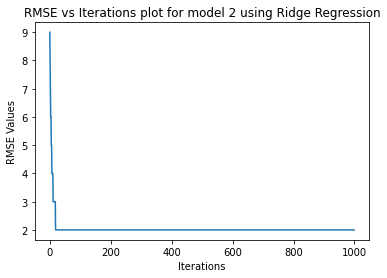

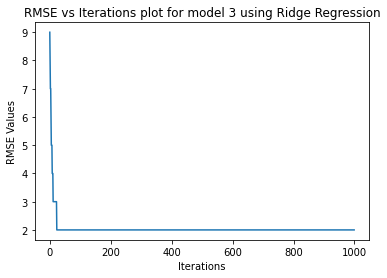

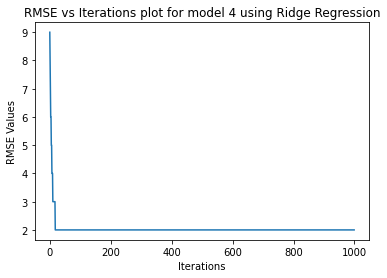

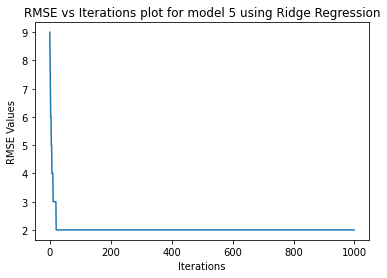

In [28]:
def ridge_gradient_descent(x, y, theta, learning_rate, iterations, ridge_parameter):
    m = len(theta)
    n = len(y)
    theta_history = np.zeros((iterations, m))
    rmse_history = np.zeros(iterations)
    for k in range(iterations):
        predictions = np.dot(x, theta.transpose())
        for j in range(m):
            func = 0
            for i in range(n):
                func += (y[i]-predictions[i])*x[i][j]
            theta[j] = theta[j] + learning_rate*func - learning_rate*ridge_parameter*theta[j]
        theta_history[k] = theta
        rmse_history[k] = rmse_function(x, y, theta)
    return theta, theta_history, rmse_history

theta_array_ridge = np.zeros((5, n_cols))  # Defining an array to store the theta values of the 5 models using Ridge Regression
model = 1
for train_index, val_index in kf.split(x_numpy):
  X_KFold_train, X_KFold_val = x_numpy[train_index], x_numpy[val_index]
  Y_KFold_train, Y_KFold_val = y_numpy[train_index], y_numpy[val_index]
  theta = np.zeros(n_cols)  # n_cols is the number of columns in the training data or dimensions of the training data
  theta_ridge_regression, theta_h, rmse_h = ridge_gradient_descent(X_KFold_val, Y_KFold_val, theta, 0.0001, 1000, 10)
  theta_array_ridge[model-1] = theta_ridge_regression
  x_axis = np.arange(0, 1000)
  plt.plot(x_axis, rmse_h)
  plt.title("RMSE vs Iterations plot for model "+str(model)+" using Ridge Regression") 
  model += 1
  plt.xlabel("Iterations") 
  plt.ylabel("RMSE Values")
  plt.show()

Defining a function for LASSO regression. Number of iterations = 1000, learning rate = 0.0001 and LASSO parameter = 10. A sign_function is also defined which is used in updating the value of theta in lasso_gradient_descent. After that, KFold is used to divide the training set into 5 folds and rmse vs iteration graph is plotted on the validation set of each fold.

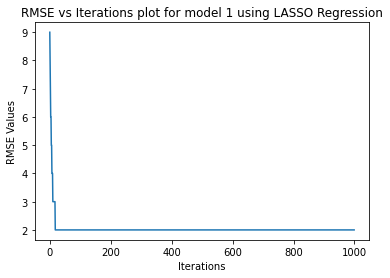

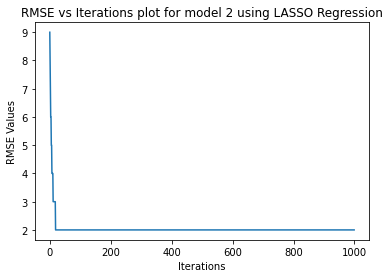

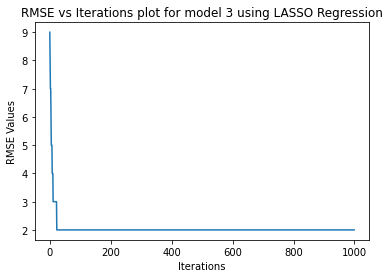

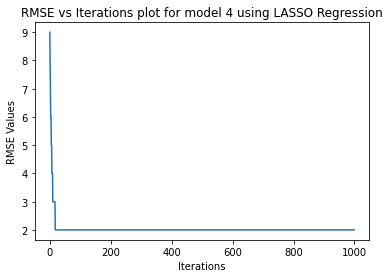

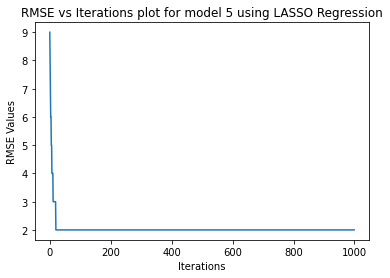

In [29]:
def sign_function(theta):
  if(theta<0):
    return -1
  elif(theta>0):
    return 1
  else:
    return 0

def lasso_gradient_descent(x, y, theta, learning_rate, iterations, lasso_parameter):
    m = len(theta)
    n = len(y)
    theta_history = np.zeros((iterations, m))
    rmse_history = np.zeros(iterations)
    for k in range(iterations):
        predictions = np.dot(x, theta.transpose())
        for j in range(m):
            func = 0
            for i in range(n):
                func += (y[i]-predictions[i])*x[i][j]
            theta[j] = theta[j] + learning_rate*func - learning_rate*lasso_parameter*sign_function(theta[j])
        theta_history[k] = theta
        rmse_history[k] = rmse_function(x, y, theta)
    return theta, theta_history, rmse_history

theta_array_lasso = np.zeros((5, n_cols))  # Defining an array to store the theta values of the 5 models using LASSO Regression
model = 1
for train_index, val_index in kf.split(x_numpy):
  X_KFold_train, X_KFold_val = x_numpy[train_index], x_numpy[val_index]
  Y_KFold_train, Y_KFold_val = y_numpy[train_index], y_numpy[val_index]
  theta = np.zeros(n_cols)  # n_cols is the number of columns in the training data or dimensions of the training data
  theta_LASSO_regression, theta_h, rmse_h = lasso_gradient_descent(X_KFold_val, Y_KFold_val, theta, 0.0001, 1000, 10)
  theta_array_lasso[model-1] = theta_LASSO_regression
  x_axis = np.arange(0, 1000)
  plt.plot(x_axis, rmse_h)
  plt.title("RMSE vs Iterations plot for model "+str(model)+" using LASSO Regression") 
  model += 1
  plt.xlabel("Iterations") 
  plt.ylabel("RMSE Values")
  plt.show()

Now, computing the average RMSE for linear regression, ridge regression and LASSO regression by taking the average of rmse for each of the 5 models obtianed from KFold.

In [30]:
X_test_numpy = np.array(X_test)
Y_test_numpy = np.array(Y_test)
rmse_sum = 0

for k in range(5):
  predictions = np.dot(X_test_numpy, theta_array[k])
  rmse_sum += np.sqrt(((Y_test_numpy-predictions)**2).mean())
avg_rmse = (rmse_sum/5)
print("Average RMSE for Linear Regression Model = "+str(avg_rmse))

Average RMSE for Linear Regression Model = 2.475253063953548


In [31]:
rmse_sum = 0
for k in range(5):
  predictions = np.dot(X_test_numpy, theta_array_ridge[k])
  rmse_sum += np.sqrt(((Y_test_numpy-predictions)**2).mean())
avg_rmse = (rmse_sum/5)
print("Average RMSE for Ridge Regression Model = "+str(avg_rmse))

Average RMSE for Ridge Regression Model = 2.528538505459113


In [32]:
rmse_sum = 0
for k in range(5):
  predictions = np.dot(X_test_numpy, theta_array_lasso[k])
  rmse_sum += np.sqrt(((Y_test_numpy-predictions)**2).mean())
avg_rmse = (rmse_sum/5)
print("Average RMSE for LASSO Regression Model = "+str(avg_rmse))

Average RMSE for LASSO Regression Model = 2.5005244037557146


Using sklearn linear regression to train the 5 folds obtained from KFold and reporting their validation set rmse and test set rmse.

In [33]:
from sklearn.linear_model import LinearRegression
model_no = 1

for train_index, val_index in kf.split(x_numpy):
  X_KFold_train, X_KFold_val = x_numpy[train_index], x_numpy[val_index]
  Y_KFold_train, Y_KFold_val = y_numpy[train_index], y_numpy[val_index]
  reg = LinearRegression(fit_intercept = True)
  model = reg.fit(X_KFold_train, Y_KFold_train)
  predictions = model.predict(X_KFold_val)
  val_set_rmse = np.sqrt(((Y_KFold_val-predictions)**2).mean())
  print("RMSE on the validation set = "+str(val_set_rmse)+" for model "+str(model_no))
  predictions = model.predict(X_test_numpy)
  test_set_rmse = np.sqrt(((Y_test_numpy-predictions)**2).mean())
  print("RMSE on the test set = "+str(test_set_rmse)+" for model "+str(model_no))
  model_no += 1

RMSE on the validation set = 2.1643091394239926 for model 1
RMSE on the test set = 2.1801559437610654 for model 1
RMSE on the validation set = 2.272277853117392 for model 2
RMSE on the test set = 2.1637722427790402 for model 2
RMSE on the validation set = 2.2970106532324603 for model 3
RMSE on the test set = 2.174370480114461 for model 3
RMSE on the validation set = 2.1727627385547326 for model 4
RMSE on the test set = 2.1761566153160876 for model 4
RMSE on the validation set = 2.241203784999549 for model 5
RMSE on the test set = 2.172676916643001 for model 5


Using closed form implementation of linear regression and reporting their validation set accuracy on the 5 folds obtained from KFold.

In [34]:
def closed_form(x, y):
  theta = np.dot(np.linalg.inv(np.dot(x.transpose(), x)), np.dot(x.transpose(), y))
  return theta

model_no = 1
for train_index, val_index in kf.split(x_numpy):
  X_KFold_train, X_KFold_val = x_numpy[train_index], x_numpy[val_index]
  Y_KFold_train, Y_KFold_val = y_numpy[train_index], y_numpy[val_index]
  theta = closed_form(X_KFold_train, Y_KFold_train)
  predictions = np.dot(X_KFold_val, theta)
  val_set_rmse = np.sqrt(((Y_KFold_val-predictions)**2).mean())
  print("RMSE on the validation set = "+str(val_set_rmse)+" for model "+str(model_no))
  model_no += 1

RMSE on the validation set = 2.1644766773002835 for model 1
RMSE on the validation set = 2.272556487617077 for model 2
RMSE on the validation set = 2.296426732412156 for model 3
RMSE on the validation set = 2.1733495057545826 for model 4
RMSE on the validation set = 2.243351806025811 for model 5
